## 1. Images as Grids of Pixels

#### Import libraries

In [1]:
import numpy as np
import matplotlib.image as mpimg  # for reading images
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

#### Read in and display the image

Image dimensions: (427, 640, 3)


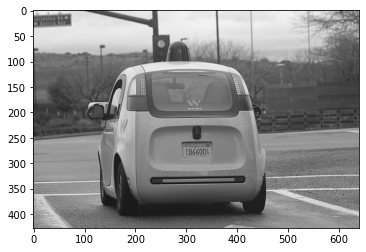

In [2]:
# Read in the image
image = mpimg.imread('images/waymo_car.jpg')

# Print out the image dimensions
print("Image dimensions:", image.shape)

# Change from color to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

plt.imshow(gray_image, cmap='gray')

In [3]:
# Print specific grayscale pixel values
# What is the pixel value at x = 400 and y = 300 (on the body of the car)?
x, y = (400, 300)

print(gray_image[y, x])

159


In [4]:
# Finds the maximum and minimum grayscale values in the image
max_val = np.amax(gray_image)
min_val = np.amin(gray_image)

print('Max:', max_val)
print('Min:', min_val)

Max: 255
Min: 2


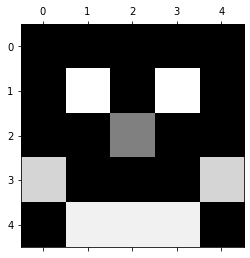

In [5]:
# Create a 5x5 image using just grayscale, numerical values
tiny_image = np.array([[50, 50, 50, 50, 50],
                       [50, 230, 50, 230, 50],
                       [50, 50, 140, 50, 50],
                       [200, 50, 50, 50, 200],
                       [50, 220, 220, 220, 50]])

# To show the pixel grid, use matshow
plt.matshow(tiny_image, cmap='gray')

## 2. Visualizing RGB channels
#### Read in an image


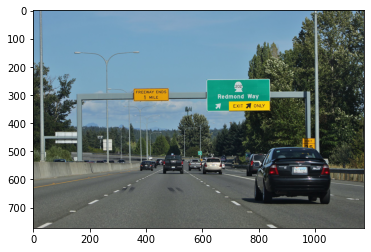

In [6]:
# Read in the image
image = mpimg.imread('images/wa_state_highway.jpg')

plt.imshow(image)

### RGB channels

Visualizethe levels of each color channel. Pay close attention to the traffic signs!

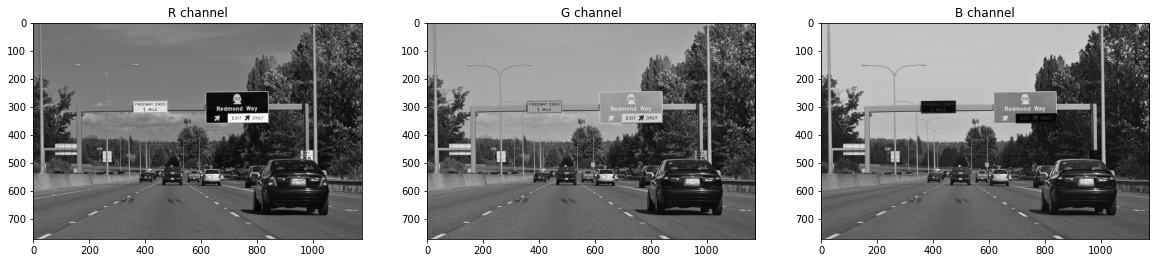

In [7]:
# Isolate RBG channels
r = image[:,:,0]
g = image[:,:,1]
b = image[:,:,2]

# Visualize the individual color channels
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))
ax1.set_title('R channel')
ax1.imshow(r, cmap='gray')
ax2.set_title('G channel')
ax2.imshow(g, cmap='gray')
ax3.set_title('B channel')
ax3.imshow(b, cmap='gray')

## 3. Color threshold , Blue screen

#### Read in and display the image

This image is: <class 'numpy.ndarray'> with dimensions: (514, 816, 3)


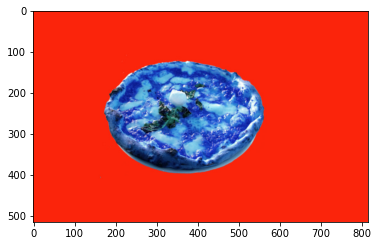

In [8]:
# Read in the image
image = cv2.imread('images/pizza_bluescreen.jpg')

# Print out the type of image data and its dimensions (height, width and color)
print('This image is:', type(image),
      'with dimensions:', image.shape)

plt.imshow(image)

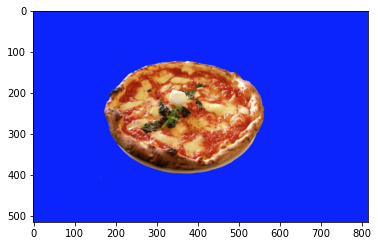

In [9]:
# Make a copy of the image
image_copy = np.copy(image)

# Change color to RGB (from BGR)
image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)

# Display the image copy
plt.imshow(image_copy)

#### Define the color threshold

In [10]:
# Define the color selections boundaries in RGB values
lower_blue = np.array([0, 0, 220])
upper_blue = np.array([220, 220, 255])

#### Create a mask

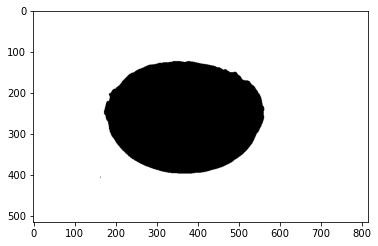

In [11]:
# Define the masked area
mask = cv2.inRange(image_copy, lower_blue, upper_blue)

# Visualise the mask
plt.imshow(mask, cmap='gray')

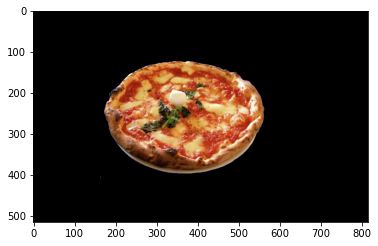

In [12]:
# Mask the image to let the pizza show through
masked_image = np.copy(image_copy)
masked_image[mask != 0] = [0, 0, 0]

# Display masked image
plt.imshow(masked_image)

#### Mask and add a background image

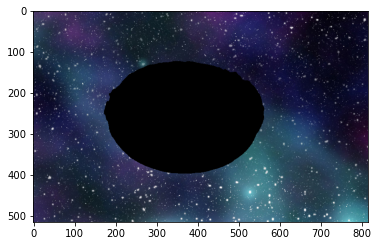

In [13]:
# Load in a background image and convert it to RGB
background_image = cv2.imread('images/space_background.jpg')
background_image = cv2.cvtColor(background_image, cv2.COLOR_BGR2RGB)

# Crop it to the right size (514x816)
crop_background = background_image[:514, :816]

# Mask the cropped background so that the pizza area is blocked
crop_background[mask == 0] = [0, 0, 0]

# Display the background
plt.imshow(crop_background)

#### Create a complete image

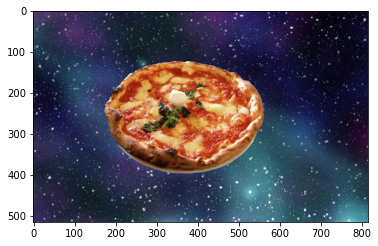

In [14]:
# Add the two images together to create a complete image!
complete_image = masked_image + crop_background

plt.imshow(complete_image)

## 4. Color Threshold, Green Screen

#### Read in and display the image

Image dimensions: (450, 660, 3)


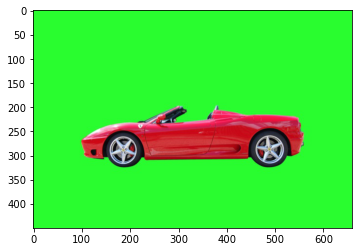

In [15]:
# Read in the image
image = cv2.imread('images/car_green_screen.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Print out the image dimensions (height, width and depth (color))
print('Image dimensions:', image.shape)

# Display the image
plt.imshow(image)

#### Define the color threshold

In [16]:
# Define color selection boundaries in RGB values
lower_green = np.array([0, 180, 0])
upper_green = np.array([120, 255, 120])

#### Create a mask

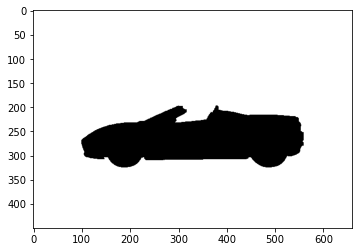

In [17]:
# Define the masked area
mask = cv2.inRange(image, lower_green, upper_green)

# Visualize the mask
plt.imshow(mask, cmap='gray')

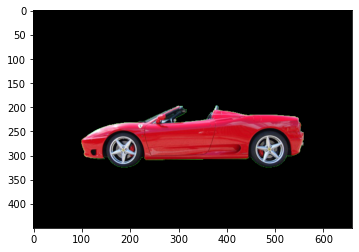

In [18]:
# Mask the image to let the car show through
masked_image = np.copy(image)

masked_image[mask != 0] = [0, 0, 0]

# Display masked image
plt.imshow(masked_image)

#### Mask and add a background image

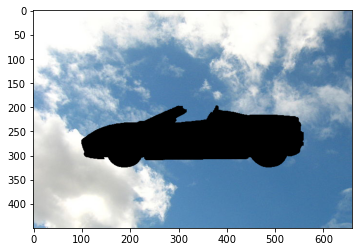

In [19]:
# Load in a background image and convert it to RGB
bg_image = cv2.imread('images/sky.jpg')
bg_image = cv2.cvtColor(bg_image, cv2.COLOR_BGR2RGB)
bg = bg_image.copy()  # create a copy to avoid ValueError: assignment destination is read-only

# Crop background image to be the right size (450x660)
crop_bg = bg[:450, :660]

# Mask the cropped background 
crop_bg[mask == 0] = [0, 0, 0]

# Display the background image
plt.imshow(crop_bg)

#### Create a complete image

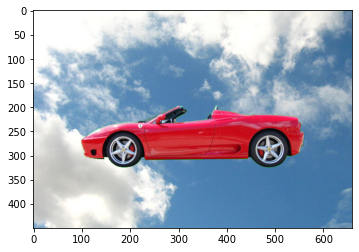

In [20]:
# Add two images together
complete_image = masked_image + crop_bg

plt.imshow(complete_image)

## 5. HSV Color Conversion

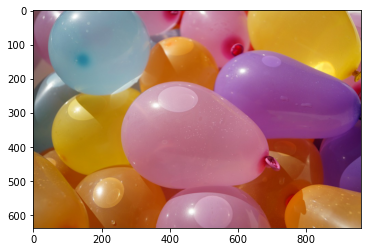

In [21]:
# Read in the image
image = cv2.imread('images/water_balloons.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)

#### Plot color channels

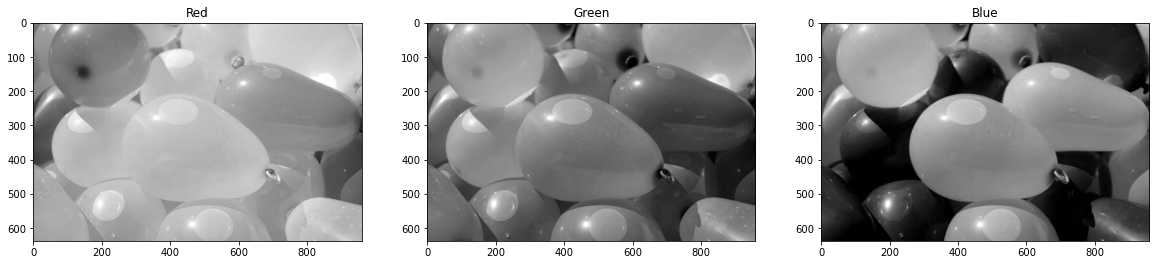

In [22]:
# RGB channels
r = image[:,:,0]
g = image[:,:,1]
b = image[:,:,2]

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))
ax1.set_title('Red')
ax1.imshow(r, cmap='gray')
ax2.set_title('Green')
ax2.imshow(g, cmap='gray')
ax3.set_title('Blue')
ax3.imshow(b, cmap='gray')

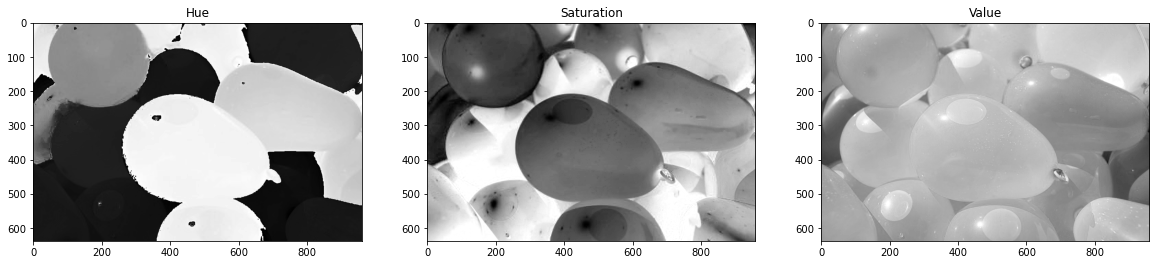

In [23]:
# Convert from RGB to HSV
hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

# HSV channels
h = hsv[:,:,0]
s = hsv[:,:,1]
v = hsv[:,:,2]

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))
ax1.set_title('Hue')
ax1.imshow(h, cmap='gray')
ax2.set_title('Saturation')
ax2.imshow(s, cmap='gray')
ax3.set_title('Value')
ax3.imshow(v, cmap='gray')

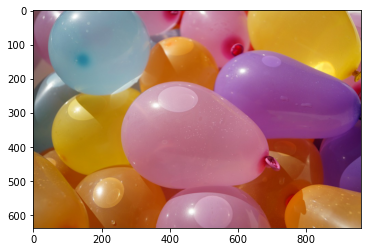

In [24]:
plt.imshow(image)

#### Define pink and hue selection thresholds
To select the most accurate color boundaries, it's often useful to use a [color picker](https://www.w3schools.com/colors/colors_picker.asp) and choose the color boundaries that define the region you want to select!

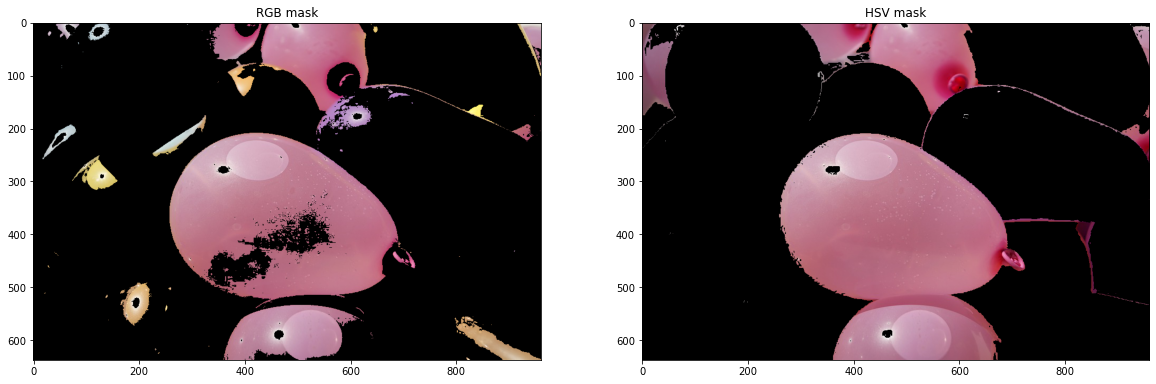

In [25]:
# Define color selection criteria in RGB values
lower_pink = np.array([180, 0, 100])
upper_pink = np.array([255, 255, 230])

# Define color selection criteria in HSV values
lower_hsv = np.array([160, 0, 0])
upper_hsv = np.array([180, 255, 255])

# Define the masked area
mask_rgb = cv2.inRange(image, lower_pink, upper_pink)  # mask area using rgb image
mask_hsv = cv2.inRange(hsv, lower_hsv, upper_hsv)      # mask area using hsv image

# Mask the image
masked_image_rgb = np.copy(image)
masked_image_rgb[mask_rgb == 0] = [0, 0, 0]
masked_image_hsv = np.copy(image)                      # apply hsv mask to rgb image
masked_image_hsv[mask_hsv == 0] = [0, 0, 0]

# Visualize the mask
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.set_title('RGB mask')
ax1.imshow(masked_image_rgb)
ax2.set_title('HSV mask')
ax2.imshow(masked_image_hsv)

#### Define other thresholds

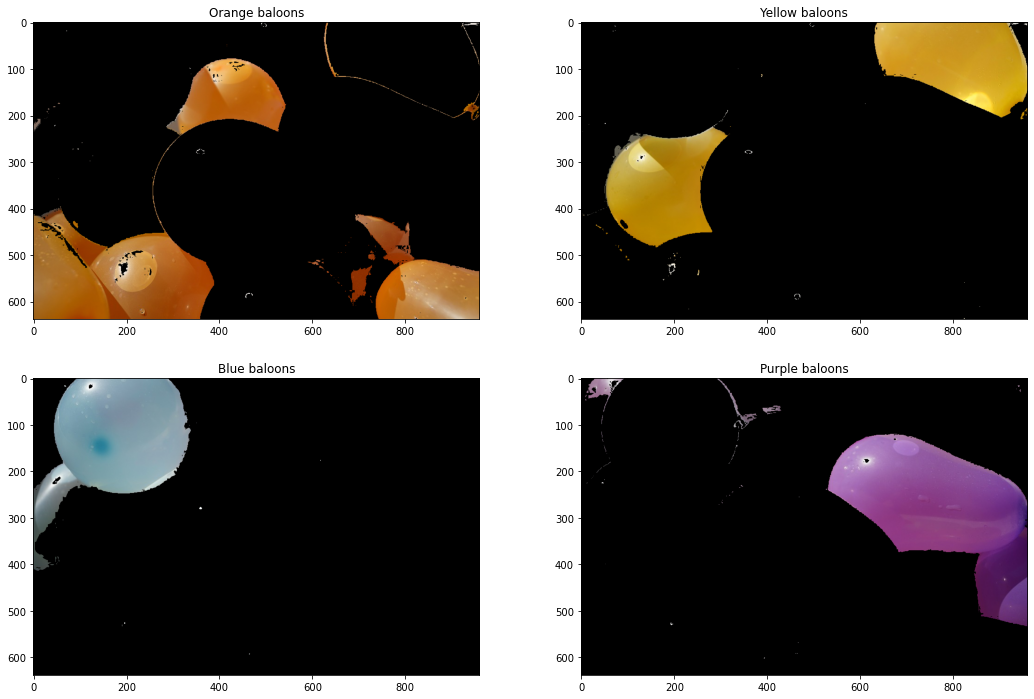

In [26]:
# orange baloon
lower_orange_hsv = np.array([10, 0, 0])
upper_orange_hsv = np.array([18, 255, 255])
# yellow baloon
lower_yellow_hsv = np.array([20, 0, 0])
upper_yellow_hsv = np.array([29, 255, 255])
# blue baloon
lower_blue_hsv = np.array([70, 0, 0])
upper_blue_hsv = np.array([110, 255, 255])
# purple baloon
lower_purple_hsv = np.array([130, 0, 0])
upper_purple_hsv = np.array([158, 255, 255])

# Define the masked area in HSV space
mask_orange_hsv = cv2.inRange(hsv, lower_orange_hsv, upper_orange_hsv)
mask_yellow_hsv = cv2.inRange(hsv, lower_yellow_hsv, upper_yellow_hsv)
mask_blue_hsv = cv2.inRange(hsv, lower_blue_hsv, upper_blue_hsv)
mask_purple_hsv = cv2.inRange(hsv, lower_purple_hsv, upper_purple_hsv)

# mask the image
masked_orange_image = np.copy(image)
masked_orange_image[mask_orange_hsv==0] = [0,0,0]
masked_yellow_image = np.copy(image)
masked_yellow_image[mask_yellow_hsv==0] = [0,0,0]
masked_blue_image = np.copy(image)
masked_blue_image[mask_blue_hsv==0] = [0,0,0]
masked_purple_image = np.copy(image)
masked_purple_image[mask_purple_hsv==0] = [0,0,0]

# Visualize masks
masked_imgs = [masked_orange_image, masked_yellow_image, masked_blue_image, masked_purple_image]
titles = ['Orange baloons', 'Yellow baloons', 'Blue baloons', 'Purple baloons']

f = plt.figure(figsize=(18,12))
for i in range(len(masked_imgs)):
    plt.subplot(2, 2, i+1)
    plt.imshow(masked_imgs[i])
    plt.title(titles[i])
    
plt.show()    